## Nova를 위한 Langchain 통합

Nova 모델을 사용한 애플리케이션 개발을 돕기 위해 멀티모달 및 에이전트 워크플로우를 위한 Langchain 지원이 추가되었습니다.

## 설정

#### 설치

In [4]:
%pip install -q langchain langchain-aws --upgrade

Note: you may need to restart the kernel to use updated packages.


**참고**: Micro는 텍스트 이해 사용 사례에, Lite와 Pro는 멀티모달 이해 사용 사례에 사용할 수 있습니다.

- Nova Micro: "us.amazon.nova-micro-v1:0"
- Nova Lite: "us.amazon.nova-lite-v1:0"
- Nova Pro: "us.amazon.nova-pro-v1:0"

## 모델 호출

#### 텍스트 이해

In [1]:
from langchain_aws import ChatBedrockConverse
from langchain_core.messages import HumanMessage

llm = ChatBedrockConverse(
    model_id="us.amazon.nova-lite-v1:0",
    temperature=0.7
)

messages = [
    ("system", "Provide three alternative song titles for a given user title"),
    ("user", "Teardrops on My Guitar"),
]

response = llm.invoke(messages)
print(f"Request ID: {response.id}")
response.pretty_print()


# Here we can pass the chat history to the model to ask follow up questions
multi_turn_messages = [
    *messages,
    response,
    HumanMessage(content="Select your favorite and tell me why"),
]

response = llm.invoke(multi_turn_messages)
print(f"\n\nRequest ID: {response.id}")
response.pretty_print()

Request ID: run-4639c75d-2b4c-4337-a393-881e07c5daf2-0
================================== Ai Message ==================================

Sure, here are three alternative song titles for "Teardrops on My Guitar":

1. "Melody of My Melancholy"
2. "Raindrops and Rhythms"
3. "Strings of Sorrow"


Request ID: run-88db0bfb-c1e5-49a3-86c9-04b218e3069b-0
================================== Ai Message ==================================

While I don't have personal preferences, I can share some insights into why each alternative title might resonate with different audiences:

1. **Melody of My Melancholy**: This title emphasizes the emotional depth and the musical aspect of the song. It suggests a beautiful, yet sorrowful tune that captures the listener's attention.

2. **Raindrops and Rhythms**: This title combines the imagery of raindrops with the idea of musical rhythms, creating a vivid and dynamic picture. It might appeal to those who appreciate the interplay between nature and music.

3. **

#### 이미지 이해

다양한 미디어 유형을 모델에 전달할 수 있습니다

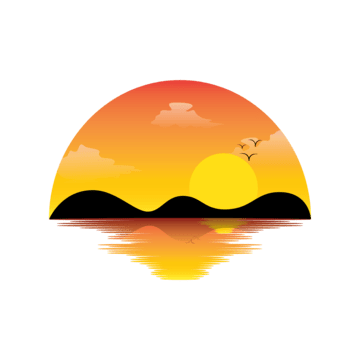

In [2]:
from IPython.display import Image

image_path = "media/sunset.png"
Image(filename=image_path)

In [3]:
import base64

from langchain_aws import ChatBedrockConverse
from langchain_core.messages import HumanMessage

llm = ChatBedrockConverse(
    model="us.amazon.nova-lite-v1:0",
    temperature=0.7
)

with open(image_path, "rb") as image_file:
    binary_data = image_file.read()

message = HumanMessage(
    content=[
        {"image": {"format": "png", "source": {"bytes": binary_data}}},
        {"text": "Provide a summary of this photo"},
    ]
)

response = llm.invoke([message])
print(f"\n\nRequest ID: {response.id}")
response.pretty_print()



Request ID: run-def60913-506c-4765-a1e3-970a10105621-0
================================== Ai Message ==================================

The image depicts a picturesque sunset scene over a tranquil lake, captured from a low angle. The sun, at its zenith, casts a warm glow over the landscape, creating a vibrant palette of orange, yellow, and red hues. The sky is a beautiful blend of clouds, adding depth and texture to the scene. The reflection of the sun and the sky can be seen shimmering on the surface of the lake, creating a serene and mesmerizing effect. The silhouette of a mountain range in the background adds to the majestic and awe-inspiring nature of the scene. The overall composition of the image is well-balanced, with the sun and sky taking center stage, while the lake and mountain range provide a stunning backdrop. The image evokes a sense of peace, tranquility, and natural beauty, making it a perfect representation of a sunset scene.


#### 비디오 이해

In [4]:
video_path = "media/the-sea.mp4"

In [5]:
from langchain_aws import ChatBedrockConverse

llm = ChatBedrockConverse(
    model="us.amazon.nova-lite-v1:0",
    temperature=0.7
)

with open(video_path, "rb") as video_file:
    binary_data = video_file.read()


message = HumanMessage(
    content=[
        {"video": {"format": "mp4", "source": {"bytes": binary_data}}},
        {"type": "text", "text": "Describe the following video"},
    ]
)

response = llm.invoke([message])
print(f"\n\nRequest ID: {response.id}")
response.pretty_print()



Request ID: run-6a280ddf-5800-4038-9169-c1063202cc21-0
================================== Ai Message ==================================

The video starts with a top-down view of a rocky shore, where the sea waves crash against the rocks. Then, it transitions to a close-up view of a beach, where a large seashell lies on the sand. The waves gently lap against the shore, and the sun shines brightly, casting a warm glow on the scene. The camera zooms in on the seashell, showing its intricate patterns and the white foamy waves in the background.


#### 스트리밍

스트리밍도 지원됩니다

In [6]:
from langchain_aws import ChatBedrockConverse
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.output_parsers import StrOutputParser

llm = ChatBedrockConverse(
    model="us.amazon.nova-lite-v1:0",
    temperature=0.7
)

chain = llm | StrOutputParser()

messages = [
    SystemMessage(content="You are an author with experience writing creative novels"),
    HumanMessage(
        content="Write an outlin for a novel about a wizard named Theodore graduating from college"
    ),
]

for chunk in chain.stream(messages):
    print(chunk, end="")

**Title: The Graduating Wizard**

**I. Introduction**

1. **Setting the Scene:**
   - A magical college called Arcanum Academy, nestled in a mystical forest.
 academy is a blend of ancient architecture and modern enchantments.

2. **Introduction to Theodore:**
   - Theodore is a 22-year-old wizard with a knack for potion-making and a curious mind.
 and his ever-present pet owl, Athena.obes

3. **Thesis Statement:**
   - Theodore is about to graduate from Arcanum Academy, but his journey is far from over.

’s Journey at Arcanum Academy**

1. **Freshman Year:**
   - Theodore’s arrival at Arcanum Academy.
, and Marcus, a skilled illusionist. a talented enchantress
   - First magical classes and the challenges of mastering spells.

2. **Sophomore Year:**
   - Theodore’s growing interest in potion-making.
   - A mentorship with Professor Elara, a renowned potion master.
 a darker side.with a fellow student, Cedric, who is equally talented but has

3. **Junior Year:**
   - The discovery of a

## 에이전트 워크플로우

Nova 모델은 도구 호출 및 에이전트 워크플로우를 처리할 수 있습니다.

#### 도구 바인딩

도구 호출을 위해 모델을 사용할 때 바인드 도구 메서드를 활용할 수 있습니다. 이는 포맷된 도구 구성을 모델에 전달합니다. 도구 호출이나 에이전트 워크플로우를 활용할 때는 그리디 디코딩 값을 사용하는 것이 좋습니다. 이는 temperature=1, topP=1, topK=1을 의미합니다

In [7]:
from langchain_aws import ChatBedrockConverse
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

tools = [multiply]

llm_with_tools = ChatBedrockConverse(
    model="us.amazon.nova-lite-v1:0",
    temperature=1,
    top_p=1,
    additional_model_request_fields={
        "inferenceConfig": {
            "topK": 1
        }
    },
).bind_tools(tools)

response = llm_with_tools.invoke([("user", "What is 8*8")])

print("[Model Response]\n")
print(response.content)

print("\n[Tool Calls]\n")
print(response.tool_calls)

[Model Response]

[{'type': 'text', 'text': "<thinking>The User has asked for the multiplication of two numbers, 8 and 8. This is a straightforward calculation that can be performed using the 'multiply' tool.</thinking>\n"}, {'type': 'tool_use', 'name': 'multiply', 'input': {'a': 8, 'b': 8}, 'id': 'tooluse_4xo6NcMSSG2cqj3v6JCEAw'}]

[Tool Calls]

[{'name': 'multiply', 'args': {'a': 8, 'b': 8}, 'id': 'tooluse_4xo6NcMSSG2cqj3v6JCEAw', 'type': 'tool_call'}]


#### 도구 호출 에이전트

전체 워크플로우를 위해 스트림의 출력을 가로채고 도구를 호출할 수 있게 해주는 커스텀 파서를 활용할 수 있습니다

In [8]:
from langchain.agents import tool, AgentExecutor, create_tool_calling_agent
from langchain_core.prompts import ChatPromptTemplate
from langchain_aws import ChatBedrockConverse

@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

tools = [multiply]

llm_with_tools = ChatBedrockConverse(
    model="us.amazon.nova-lite-v1:0",
    temperature=1,
    top_p=1,
    additional_model_request_fields={
        "inferenceConfig": {
            "topK": 1
        }
    },
).bind_tools(tools)

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)

agent = create_tool_calling_agent(llm, tools, prompt)

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

agent_executor.invoke({"input": "What is 2*2?"})



> Entering new AgentExecutor chain...

Invoking: `multiply` with `{'a': 2, 'b': 2}`
responded: [{'type': 'text', 'text': "<thinking>The User is asking for a simple multiplication of two numbers. I have the tool 'multiply' which can be used to perform this task.</thinking>\n", 'index': 0}, {'type': 'tool_use', 'name': 'multiply', 'id': 'tooluse_S5Nv_U5xQO-VVOf3aL7cgQ', 'index': 1, 'input': '{"a":2,"b":2}'}]

[{'type': 'text', 'text': "<thinking>The tool 'multiply' has returned the result of 2*2, which is 4.</thinking>\nThe result of 2*2 is 4.", 'index': 0}]

> Finished chain.


{'input': 'What is 2*2?',
 'output': [{'type': 'text',
   'text': "<thinking>The tool 'multiply' has returned the result of 2*2, which is 4.</thinking>\nThe result of 2*2 is 4.",
   'index': 0}]}

## 구조화된 출력

구조화된 출력은 모델이 특정 방식으로 반환하도록 강제하는 좋은 방법입니다. 여기서는 더 결정론적인 결과를 위해 그리디 디코딩 매개변수를 사용합니다(Temperature = 1, Top P = 1, Top K = 1)

In [10]:
from pydantic import BaseModel, Field
from langchain_aws import ChatBedrockConverse

class Joke(BaseModel):
    """A joke to respond to the user"""
    setup: str = Field(description="The setup of the joke")
    punchline: str = Field(description="The punchline to the joke")

llm = ChatBedrockConverse(
    model="us.amazon.nova-lite-v1:0",
    temperature=1,
    top_p=1,
    additional_model_request_fields={
        "inferenceConfig": {
            "topK": 1
        }
    },
)

structured_llm = llm.with_structured_output(Joke)
structured_llm.invoke("Tell me a joke about cats")

Joke(setup='Why did the cat go to the party?', punchline='To get a mouse-ic!')